In [1]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn import metrics
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix


from scipy.stats import chisquare

from sklearn.impute import SimpleImputer

from sklearn.neighbors import KNeighborsClassifier

from sklearn.model_selection import cross_val_score

from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, roc_auc_score, roc_curve, auc
%matplotlib inline

%pylab inline

import pandas as pd
import seaborn as sns

import warnings
warnings.filterwarnings("ignore")

Populating the interactive namespace from numpy and matplotlib


/opt/conda/lib/python3.6/site-packages/IPython/core/magics/pylab.py:160: UserWarning: pylab import has clobbered these variables: ['chisquare']
`%matplotlib` prevents importing * from pylab and numpy
  "\n`%matplotlib` prevents importing * from pylab and numpy"


In [2]:

df_wine = pd.read_csv("../input/hr-analytics/HR_comma_sep.csv")
df_wine.columns = ['satisfaction_level','last_evaluation','number_project',
        'average_montly_hours','time_spend_company','Work_accident','left',
        'promotion_last_5years','Department','salary']

# Import label encoder salary

In [3]:
# Import label encoder 
from sklearn import preprocessing 
  
# label_encoder object knows how to understand word labels. 
label_encoder = preprocessing.LabelEncoder() 
  
# Encode labels in column 'salary'. 
df_wine['salary']= label_encoder.fit_transform(df_wine['salary']) 
  
df_wine['salary'].unique()

array([1, 2, 0])

# label encoder Department

In [4]:
# Import label encoder 
from sklearn import preprocessing 
  
# label_encoder object knows how to understand word labels. 
label_encoder = preprocessing.LabelEncoder() 
  
# Encode labels in column 'Department'. 
df_wine['Department']= label_encoder.fit_transform(df_wine['Department']) 
  
df_wine['Department'].unique() 

array([7, 2, 3, 9, 8, 4, 0, 6, 5, 1])

# Training model

In [5]:
from sklearn.model_selection import train_test_split

feature_column_names = ['satisfaction_level','last_evaluation','number_project','average_montly_hours','time_spend_company']
predicted_class_name = ['left']

# Getting feature variable values
X = df_wine[feature_column_names].values
y = df_wine[predicted_class_name].values

# Splitting using scikit-learn train_test_split function
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.30, random_state = 42)


# RandomForestClassifier Importances

In [6]:
from sklearn.ensemble import RandomForestClassifier

In [7]:
rfc = RandomForestClassifier(random_state=42)

rfc.fit(X_train, y_train.ravel())

rf_predict_train = rfc.predict(X_train)

rf_accuracy = metrics.accuracy_score(y_train, rf_predict_train)
print ("Accuracy: {0:.4f}".format(rf_accuracy))

Accuracy: 0.9975


In [8]:
rf_predict_test = rfc.predict(X_test)

rf_accuracy_testdata = metrics.accuracy_score(y_test, rf_predict_test)
print ("Accuracy: {0:.4f}".format(rf_accuracy_testdata))

print ("Confusion Matrix for Random Forest")
print ("{0}".format(metrics.confusion_matrix(y_test, rf_predict_test, labels=[1, 0])))
print ("")
print ("Classification Report\n")
print ("{0}".format(metrics.classification_report(y_test, rf_predict_test, labels=[1, 0])))

Accuracy: 0.9864
Confusion Matrix for Random Forest
[[1019   53]
 [   8 3420]]

Classification Report

              precision    recall  f1-score   support

           1       0.99      0.95      0.97      1072
           0       0.98      1.00      0.99      3428

    accuracy                           0.99      4500
   macro avg       0.99      0.97      0.98      4500
weighted avg       0.99      0.99      0.99      4500



 # random forest cross validation

In [9]:
from sklearn.model_selection import cross_val_score
from sklearn.metrics import classification_report, confusion_matrix


In [10]:
rfc_cv_score = cross_val_score(rfc, X, y, cv=10, scoring='roc_auc')

In [11]:
print("=== Confusion Matrix ===")
print(confusion_matrix(y_test, rf_predict_test))
print('\n')
print("=== Classification Report ===")
print(classification_report(y_test, rf_predict_test))
print('\n')
print("=== All AUC Scores ===")
print(rfc_cv_score)
print('\n')
print("=== Mean AUC Score ===")
scb = rfc_cv_score.mean()
print("Mean AUC Score - Random Forest: ", rfc_cv_score.mean())

=== Confusion Matrix ===
[[3420    8]
 [  53 1019]]


=== Classification Report ===
              precision    recall  f1-score   support

           0       0.98      1.00      0.99      3428
           1       0.99      0.95      0.97      1072

    accuracy                           0.99      4500
   macro avg       0.99      0.97      0.98      4500
weighted avg       0.99      0.99      0.99      4500



=== All AUC Scores ===
[0.99994257 0.99949271 0.9824397  0.97115189 0.96932981 0.99540254
 0.99951232 0.9993567  0.99998896 1.        ]


=== Mean AUC Score ===
Mean AUC Score - Random Forest:  0.9916617191728492


# Another way random forest cross validation

In [12]:
#from sklearn.ensemble import RandomForestClassifier
#classifier = RandomForestClassifier(n_estimators=300, random_state=0)

In [13]:
#from sklearn.model_selection import cross_val_score
#all_accuracies = cross_val_score(estimator=classifier, X=X_train, y=y_train, cv=5)

In [14]:
#print(all_accuracies)

# KNeighborsClassifier

In [15]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn import metrics

from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X, y)
y_pred = knn.predict(X)
print(metrics.accuracy_score(y, y_pred))

knn = KNeighborsClassifier(n_neighbors=1)
knn.fit(X, y)
y_pred = knn.predict(X)
print(metrics.accuracy_score(y, y_pred))

In [16]:
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train, y_train)
knn_accuracy = knn.score(X_train, y_train)
print('Training accuracy:', knn.score(X_train, y_train))
knn_accuracy_testdata = knn.score(X_test, y_test)
print('Test accuracy:', knn.score(X_test, y_test))

Training accuracy: 0.9638060767692161
Test accuracy: 0.9464444444444444


In [17]:
from sklearn.model_selection import cross_val_score


# KNeighborsClassifier cross validation

In [18]:
# 10-fold cross-validation with K=5 for KNN (the n_neighbors parameter)
# k = 5 for KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=5)

# Use cross_val_score function
# We are passing the entirety of X and y, not X_train or y_train, it takes care of splitting the dat
# cv=10 for 10 folds
# scoring='accuracy' for evaluation metric - althought they are many
scores = cross_val_score(knn, X, y, cv=10, scoring='accuracy')
print(scores)

[0.9526982  0.946      0.95133333 0.944      0.94533333 0.94466667
 0.948      0.94733333 0.96130754 0.95997332]


In [19]:
# use average accuracy as an estimate of out-of-sample accuracy
# numpy array has a method mean()
print(scores.mean())

0.9500645721768469


In [20]:
# search for an optimal value of K for KNN

# range of k we want to try
k_range = range(1, 31)
# empty list to store scores
k_scores = []

# 1. we will loop through reasonable values of k
for k in k_range:
    # 2. run KNeighborsClassifier with k neighbours
    knn = KNeighborsClassifier(n_neighbors=k)
    # 3. obtain cross_val_score for KNeighborsClassifier with k neighbours
    scores = cross_val_score(knn, X, y, cv=10, scoring='accuracy')
    # 4. append mean of scores for k neighbors to k_scores list
    k_scores.append(scores.mean())


print(k_scores)


[0.9721347545487797, 0.9726007545188539, 0.9608656854514157, 0.9553313285028127, 0.9500645721768469, 0.9583980397620918, 0.9544644390508618, 0.9557978613916422, 0.9512639496580517, 0.9529307943988716, 0.9487971492135479, 0.9503976383693207, 0.9461302153467624, 0.9475303933616562, 0.9453301263985747, 0.9468638155246587, 0.9445299928577746, 0.9452635929764117, 0.9427295479390583, 0.9438631037613796, 0.9414625255389002, 0.9429294591686486, 0.9401956363832458, 0.9409956364425052, 0.9380615913458923, 0.938795058279285, 0.9365279021605492, 0.9377948802051319, 0.9360613243235516, 0.9377951469311764]


0.9721347545487797
0.9726007545188539
0.9608656854514157
0.9553313285028127
0.9500645721768469
0.9583980397620918
0.9544644390508618
0.9557978613916422
0.9512639496580517


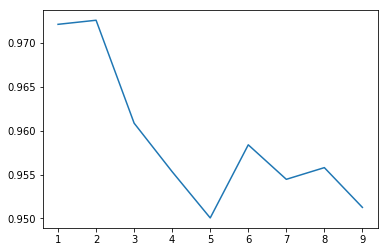

KNN with N-Fold Cross Validation is giving best score as 97.26007545188538% for K=2


In [21]:
k_range=np.arange(1,10,1)
k_score=[]
best_accuracy_score_knn=0
best_k=0
for k in k_range:
    score=cross_val_score(KNeighborsClassifier(n_neighbors=k), X, y.ravel(), cv=10, scoring='accuracy').mean()
    
    print(score)
    
    k_score.append(score)
    if best_accuracy_score_knn<score:
        best_accuracy_score_knn=score
        best_k=k
knn_plot=plt
knn_plot.plot(k_range, k_score)
knn_plot.show()
print(f"KNN with N-Fold Cross Validation is giving best score as {best_accuracy_score_knn*100}% for K={best_k}")

# decision tree

In [22]:
#decision tree
from sklearn import tree
dt = tree.DecisionTreeClassifier()
dt.fit(X_train, y_train)
dt_score_train = dt.score(X_train, y_train)
print("Training score: ",dt_score_train)
dt_score_test = dt.score(X_test, y_test)
print("Testing score: ",dt_score_test)

Training score:  0.9998095056672064
Testing score:  0.9784444444444444


# cross-validation 

In [23]:
# 10-fold cross-validation 
dt = tree.DecisionTreeClassifier()

# Use cross_val_score function
# We are passing the entirety of X and y, not X_train or y_train, it takes care of splitting the dat
# cv=10 for 10 folds
# scoring='accuracy' for evaluation metric - althought they are many
scores = cross_val_score(dt, X, y, cv=10, scoring='accuracy')
print(scores)

[0.98201199 0.984      0.97133333 0.966      0.96466667 0.97933333
 0.98733333 0.99066667 0.99933289 1.        ]


0.9812013323857773
0.9825345324746071
0.9822677769782713
0.9824676881486021
0.9825344436449379
0.9823345768894416
0.9824010658967699
0.982667910222775
0.9828011547264393


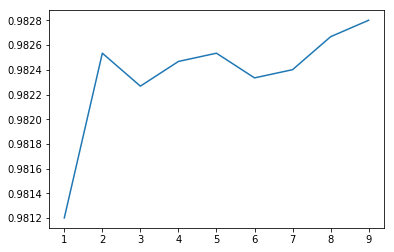

KNN with N-Fold Cross Validation is giving best score as 0.9828011547264393 for K=9


In [24]:
k_range=np.arange(1,10,1)
k_score=[]
best_accuracy_score_dt=0
best_k=0
for k in k_range:
    score=cross_val_score(tree.DecisionTreeClassifier(), X, y.ravel(), cv=10, scoring='accuracy').mean()
    
    print(score)
    
    k_score.append(score)
    if best_accuracy_score_dt<score:
        best_accuracy_score_dt=score
        best_k=k
knn_plot=plt
knn_plot.plot(k_range, k_score)
knn_plot.show()
print(f"KNN with N-Fold Cross Validation is giving best score as {best_accuracy_score_dt} for K={best_k}")

# LogisticRegression

In [25]:
from sklearn.linear_model import LogisticRegression

In [26]:
logis = LogisticRegression()
logis.fit(X_train, y_train)
logis_score_train = logis.score(X_train, y_train)
print("Training score: ",logis_score_train)
logis_score_test = logis.score(X_test, y_test)
print("Testing score: ",logis_score_test)

Training score:  0.7693113629869511
Testing score:  0.7595555555555555


In [27]:
# 10-fold cross-validation 
dt = LogisticRegression()

# Use cross_val_score function
# We are passing the entirety of X and y, not X_train or y_train, it takes care of splitting the dat
# cv=10 for 10 folds
# scoring='accuracy' for evaluation metric - althought they are many
scores = cross_val_score(dt, X, y, cv=10, scoring='accuracy')
print(scores)

[0.77748168 0.768      0.778      0.77866667 0.788      0.77733333
 0.77666667 0.76       0.71047365 0.6897932 ]


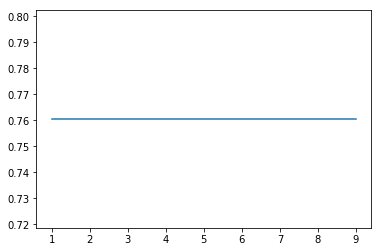

GB with N-Fold Cross Validation is giving best score as 76.04415190110456% for K=1


In [28]:
G_range=np.arange(1,10,1)
G_score=[]
best_accuracy_score_lg=0
best_G=0
for k in G_range:
    score=cross_val_score(LogisticRegression(), X, y.ravel(), cv=10, scoring='accuracy').mean()
    G_score.append(score)
    if best_accuracy_score_lg<score:
        best_accuracy_score_lg=score
        best_G=k
GB_plot=plt
GB_plot.plot(G_range, G_score)
GB_plot.show()
print(f"GB with N-Fold Cross Validation is giving best score as {best_accuracy_score_lg*100}% for K={best_G}")

# GaussianNB

In [29]:
from sklearn.naive_bayes import GaussianNB
nb_model= GaussianNB()
nb_model.fit(X_train, y_train.ravel())  # ravel() return 1-D array

# get current accuracy of the model
prediction_from_trained_data = nb_model.predict(X_train)
accuracy = metrics.accuracy_score(y_train, prediction_from_trained_data)
print ("Accuracy of our GaussianNB model is : {0:.4f}".format(accuracy))

Accuracy of our GaussianNB model is : 0.8032


In [30]:
# this returns array of predicted results from test_data
prediction_from_test_data = nb_model.predict(X_test)

accuracy = metrics.accuracy_score(y_test, prediction_from_test_data)

print ("Accuracy of our GaussianNB model is: {0:0.4f} %".format(accuracy))


print ("Confusion Matrix")
print ("{0}".format(metrics.confusion_matrix(y_test, prediction_from_test_data, labels=[1, 0])))

print ("Classification Report")
# labels for set 1=True to upper left and 0 = False to lower right
print ("{0}".format(metrics.classification_report(y_test, prediction_from_test_data, labels=[1, 0])))

Accuracy of our GaussianNB model is: 0.7933 %
Confusion Matrix
[[ 442  630]
 [ 300 3128]]
Classification Report
              precision    recall  f1-score   support

           1       0.60      0.41      0.49      1072
           0       0.83      0.91      0.87      3428

    accuracy                           0.79      4500
   macro avg       0.71      0.66      0.68      4500
weighted avg       0.78      0.79      0.78      4500



In [31]:
GV = GaussianNB()

# Use cross_val_score function
# We are passing the entirety of X and y, not X_train or y_train, it takes care of splitting the dat
# cv=10 for 10 folds
# scoring='accuracy' for evaluation metric - althought they are many
scores = cross_val_score(GV, X, y, cv=10, scoring='accuracy')
print(scores)

[0.81412392 0.79       0.82666667 0.80933333 0.80533333 0.802
 0.808      0.788      0.80186791 0.7838559 ]


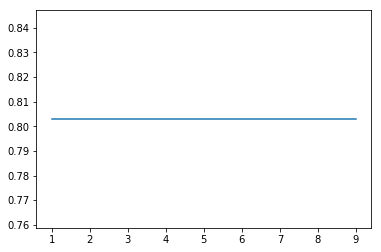

GB with N-Fold Cross Validation is giving best score as 80.29181066598994% for K=1


In [32]:
G_range=np.arange(1,10,1)
G_score=[]
best_accuracy_score_GB=0
best_G=0
for k in G_range:
    score=cross_val_score(GaussianNB(), X, y.ravel(), cv=10, scoring='accuracy').mean()
    G_score.append(score)
    if best_accuracy_score_GB<score:
        best_accuracy_score_GB=score
        best_G=k
GB_plot=plt
GB_plot.plot(G_range, G_score)
GB_plot.show()
print(f"GB with N-Fold Cross Validation is giving best score as {best_accuracy_score_GB*100}% for K={best_G}")

# svm

In [33]:
from sklearn.svm import SVC
svm = SVC()
svm.fit(X_train, y_train)
svm_score_train = svm.score(X_train, y_train)
print("Training score: ",svm_score_train)
svm_score_test = svm.score(X_test, y_test)
print("Testing score: ",svm_score_test)

Training score:  0.9635203352700257
Testing score:  0.9526666666666667


In [34]:
# 10-fold cross-validation 
svm = SVC()

# Use cross_val_score function
# We are passing the entirety of X and y, not X_train or y_train, it takes care of splitting the dat
# cv=10 for 10 folds
# scoring='accuracy' for evaluation metric - althought they are many
scores = cross_val_score(svm, X, y, cv=10, scoring='accuracy')
print(scores)

[0.95936043 0.95133333 0.95533333 0.958      0.95533333 0.956
 0.96133333 0.95666667 0.96797865 0.96864576]


In [35]:
#Model comparison
models = pd.DataFrame({
        'Model'          : ['Logistic Regression', 'kNN', 'Decision Tree', 'Random Forest','GaussianNB'],
        'Training_Score' : [logis_score_train, knn_accuracy, dt_score_train, rf_accuracy, accuracy],
        'Testing_Score'  : [logis_score_test, knn_accuracy_testdata, dt_score_test, rf_accuracy_testdata,accuracy ],
        'Cross validation Sc' :[best_accuracy_score_lg, best_accuracy_score_knn,best_accuracy_score_dt,rfc_cv_score.mean(),best_accuracy_score_GB]
})
models.sort_values(by='Testing_Score', ascending=False)

,Model,Training_Score,Testing_Score,Cross validation Sc
3,Random Forest,0.997524,0.986444,0.991662
2,Decision Tree,0.999810,0.978444,0.982801
1,kNN,0.963806,0.946444,0.972601
4,GaussianNB,0.793333,0.793333,0.802918
0,Logistic Regression,0.769311,0.759556,0.760442


NotFittedError: This KNeighborsClassifier instance is not fitted yet. Call 'fit' with appropriate arguments before using this method.

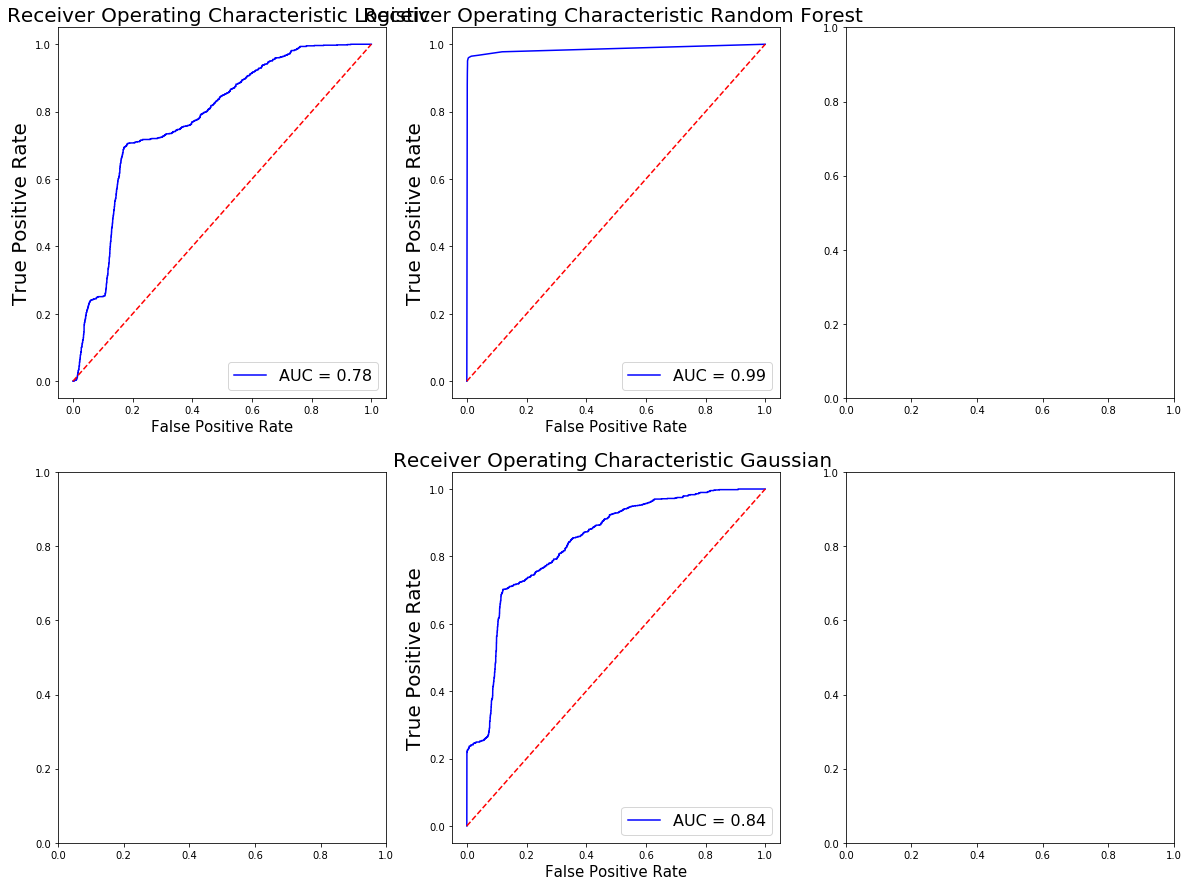

In [36]:
#fig, (ax1, ax2, ax3, ax4, ax5) = plt.subplots(nrows = 2, ncols = 3, figsize = (15, 4))
fig, ax_arr = plt.subplots(nrows = 2, ncols = 3, figsize = (20,15))

#LOGMODEL
probs = logis.predict_proba(X_test)
preds = probs[:,1]
fprlog, tprlog, thresholdlog = metrics.roc_curve(y_test, preds)
roc_auclog = metrics.auc(fprlog, tprlog)

ax_arr[0,0].plot(fprlog, tprlog, 'b', label = 'AUC = %0.2f' % roc_auclog)
ax_arr[0,0].plot([0, 1], [0, 1],'r--')
ax_arr[0,0].set_title('Receiver Operating Characteristic Logistic ',fontsize=20)
ax_arr[0,0].set_ylabel('True Positive Rate',fontsize=20)
ax_arr[0,0].set_xlabel('False Positive Rate',fontsize=15)
ax_arr[0,0].legend(loc = 'lower right', prop={'size': 16})

#GAUSSIAN ---------------------
probs = nb_model.predict_proba(X_test)
preds = probs[:,1]
fprgau, tprgau, thresholdgau = metrics.roc_curve(y_test, preds)
roc_aucgau = metrics.auc(fprgau, tprgau)

ax_arr[1,1].plot(fprgau, tprgau, 'b', label = 'AUC = %0.2f' % roc_aucgau)
ax_arr[1,1].plot([0, 1], [0, 1],'r--')
ax_arr[1,1].set_title('Receiver Operating Characteristic Gaussian ',fontsize=20)
ax_arr[1,1].set_ylabel('True Positive Rate',fontsize=20)
ax_arr[1,1].set_xlabel('False Positive Rate',fontsize=15)
ax_arr[1,1].legend(loc = 'lower right', prop={'size': 16})

#RANDOM FOREST --------------------
probs = rfc.predict_proba(X_test)
preds = probs[:,1]
fprrfc, tprrfc, thresholdrfc = metrics.roc_curve(y_test, preds)
roc_aucrfc = metrics.auc(fprrfc, tprrfc)

ax_arr[0,1].plot(fprrfc, tprrfc, 'b', label = 'AUC = %0.2f' % roc_aucrfc)
ax_arr[0,1].plot([0, 1], [0, 1],'r--')
ax_arr[0,1].set_title('Receiver Operating Characteristic Random Forest ',fontsize=20)
ax_arr[0,1].set_ylabel('True Positive Rate',fontsize=20)
ax_arr[0,1].set_xlabel('False Positive Rate',fontsize=15)
ax_arr[0,1].legend(loc = 'lower right', prop={'size': 16})

#KNN----------------------
probs = knn.predict_proba(X_test)
preds = probs[:,1]
fprknn, tprknn, thresholdknn = metrics.roc_curve(y_test, preds)
roc_aucknn = metrics.auc(fprknn, tprknn)

ax_arr[0,2].plot(fprknn, tprknn, 'b', label = 'AUC = %0.2f' % roc_aucknn)
ax_arr[0,2].plot([0, 1], [0, 1],'r--')
ax_arr[0,2].set_title('Receiver Operating Characteristic KNN ',fontsize=20)
ax_arr[0,2].set_ylabel('True Positive Rate',fontsize=20)
ax_arr[0,2].set_xlabel('False Positive Rate',fontsize=15)
ax_arr[0,2].legend(loc = 'lower right', prop={'size': 16})


#DECISION TREE ---------------------
probs = dt.predict_proba(X_test)
preds = probs[:,1]
fprdtree, tprdtree, thresholddtree = metrics.roc_curve(y_test, preds)
roc_aucdtree = metrics.auc(fprdtree, tprdtree)

ax_arr[1,0].plot(fprdtree, tprdtree, 'b', label = 'AUC = %0.2f' % roc_aucdtree)
ax_arr[1,0].plot([0, 1], [0, 1],'r--')
ax_arr[1,0].set_title('Receiver Operating Characteristic Decision Tree ',fontsize=20)
ax_arr[1,0].set_ylabel('True Positive Rate',fontsize=20)
ax_arr[1,0].set_xlabel('False Positive Rate',fontsize=15)
ax_arr[1,0].legend(loc = 'lower right', prop={'size': 16})


#SVM ---------------------
probs = svm.predict_proba(X_test)
preds = probs[:,1]
fprgau, tprgau, thresholdgau = metrics.roc_curve(y_test, preds)
roc_aucgau = metrics.auc(fprgau, tprgau)

ax_arr[1,1].plot(fprgau, tprgau, 'b', label = 'AUC = %0.2f' % roc_aucgau)
ax_arr[1,1].plot([0, 1], [0, 1],'r--')
ax_arr[1,1].set_title('Receiver Operating Characteristic Gaussian ',fontsize=20)
ax_arr[1,1].set_ylabel('True Positive Rate',fontsize=20)
ax_arr[1,1].set_xlabel('False Positive Rate',fontsize=15)
ax_arr[1,1].legend(loc = 'lower right', prop={'size': 16})

#ALL PLOTS ----------------------------------
ax_arr[1,2].plot(fprgau, tprgau, 'b', label = 'Gaussian', color='black')
ax_arr[1,2].plot(fprdtree, tprdtree, 'b', label = 'Decision Tree', color='blue')
ax_arr[1,2].plot(fprknn, tprknn, 'b', label = 'Knn', color='brown')
ax_arr[1,2].plot(fprrfc, tprrfc, 'b', label = 'Random Forest', color='green')
ax_arr[1,2].plot(fprlog, tprlog, 'b', label = 'Logistic', color='grey')
ax_arr[1,2].set_title('Receiver Operating Comparison ',fontsize=20)
ax_arr[1,2].set_ylabel('True Positive Rate',fontsize=20)
ax_arr[1,2].set_xlabel('False Positive Rate',fontsize=15)
ax_arr[1,2].legend(loc = 'lower right', prop={'size': 16})

plt.subplots_adjust(wspace=0.2)
plt.tight_layout() 